# Data Processing

### Import Packages

In [1]:
import re
import pandas as pd

import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

### Visualisation for BERT

In [2]:
def show_metrics(y_test, y_pred):

    # Adding classes names for interpretation
    classes_names = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']
    cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                      columns=classes_names, index=classes_names)
                      
    # Visualize confusion matrix
    sns.heatmap(cm, annot=True, fmt='d');

    # Print classification report
    print(classification_report(y_test, y_pred))

In [3]:
bert_findings_df = pd.read_csv('findings_BERT.csv')
bert_findings_df.head()

,pred
0,1
1,0
2,1
3,2
4,2


In [4]:
temp_df = pd.read_csv('findings_TradML.csv', encoding='latin')
temp_df = pd.concat([temp_df, bert_findings_df], axis=1)
temp_df['bert'] = temp_df['pred'].map(lambda x: 'POSITIVE' if x == 2 else 'NEUTRAL' if x == 1 else 'NEGATIVE')
temp_df.drop(['pred'], axis=1, inplace=True)
temp_df.head()

,dataset,category,subreddit,author,created_date,score,text,text_clean,label_1,label_2,...,index,text_clean_stopword,normalize_text_clean,X_test,y_test,nb,svm,xgboost,stacked,bert
0,test,comment,r/china,SuspiciousStable9649,5/14/2022 3:53,1,"- Workers ??????????can see the ceiling, due...",workers can see the ceiling due to market matu...,NEGATIVE,POSITIVE,...,19558,workers see ceiling due market maturations hu ...,workers see ceiling due market maturations hu ...,workers see ceiling due market maturations hu ...,NEGATIVE,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,NEUTRAL
1,test,comment,r/unitedkingdom,Phallic_Entity,11/1/2020 1:21,8,> The country will be broke and in masses of ...,the country will be broke and in masses of deb...,NEGATIVE,NEGATIVE,...,19559,country broke masses debt sell northern labour...,country broke masses debt sell northern labour...,country broke masses debt sell northern labour...,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE
2,test,comment,r/usa,dannylenwinn,4/2/2021 16:28,-1,"The U.S. economy added a whopping 916,000 job...",the us economy added a whopping jobs last mont...,NEGATIVE,POSITIVE,...,19560,us economy added whopping jobs last month unem...,us economy added whopping jobs last month unem...,us economy added whopping jobs last month unem...,POSITIVE,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,NEUTRAL
3,test,comment,r/cscareerquestions,NaN,11/30/2022 21:11,26,??????????I don??????????t have cobol mentio...,i dont have cobol mentioned on my resume okay ...,POSITIVE,POSITIVE,...,19561,dont cobol mentioned resume okay makes sense y...,dont cobol mentioned resume okay makes sense y...,dont cobol mentioned resume okay makes sense y...,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE
4,test,comment,r/cscareerquestions,soprof,11/17/2016 9:41,13,20 years...\nThat's like a century in IT. Quak...,years thats like a century in it quake and dia...,POSITIVE,POSITIVE,...,19562,years thats like century quake diablo released...,years thats like century quake diablo released...,years thats like century quake diablo released...,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE


Accuracy Score: 73.8%
F1 Score: 73.6405417837976%

              precision    recall  f1-score   support

    NEGATIVE       0.80      0.83      0.82       508
     NEUTRAL       0.50      0.49      0.50       160
    POSITIVE       0.75      0.71      0.73       332

    accuracy                           0.74      1000
   macro avg       0.68      0.68      0.68      1000
weighted avg       0.74      0.74      0.74      1000



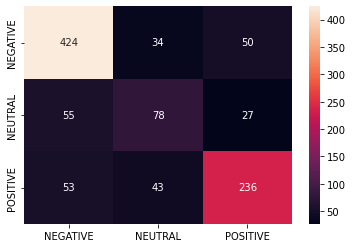

In [5]:
acc = accuracy_score(temp_df['y_test'], temp_df['bert']) * 100
f1 = f1_score(temp_df['y_test'], temp_df['bert'], average='weighted') * 100

print('Accuracy Score: ', acc, '%', sep='')
print('F1 Score: ', f1, '%', sep='')
print()

show_metrics(temp_df['y_test'], temp_df['bert'])

### Import Datasets

In [6]:
df = pd.read_csv('reddit_combined_clean_label_split_stopword.csv') 
df

,dataset,category,subreddit,author,created_date,score,text,text_clean,label_1,label_2,label_3,final_label,text_clean_stopword
0,train,comment,r/cscareerquestions,Linooney,4/30/2020 1:58,20,> People wait for existing faculty to die to h...,people wait for existing faculty to die to hav...,POSITIVE,POSITIVE,NEUTRAL,POSITIVE,people wait existing faculty die space hire lm...
1,train,comment,r/cscareerquestions,Dunan,4/30/2020 4:07,1,"> People who are being layed off, are they sof...",people who are being layed off are they softwa...,POSITIVE,POSITIVE,NEUTRAL,POSITIVE,people layed software engineers different depa...
2,train,comment,r/cscareerquestions,wtfnowdoIdo,1/2/2021 0:08,0,"> Personally, I switched jobs after 1.5 years ...",personally i switched jobs after years of expe...,POSITIVE,POSITIVE,NEUTRAL,POSITIVE,personally switched jobs years experience key ...
3,train,comment,r/cscareerquestions,nyamuk91,4/28/2020 16:31,6,"> PM's don't do performance reviews, that's fo...",pms dont do performance reviews thats for mana...,NEUTRAL,POSITIVE,NEUTRAL,POSITIVE,pms dont performance reviews thats management ...
4,train,comment,r/cscareerquestions,OldSWEThrowaway,7/10/2021 2:19,-1,> pretty hard\r\nMore like impossible due to l...,pretty hard more like impossible due to legal ...,POSITIVE,NEGATIVE,NEGATIVE,NEGATIVE,pretty hard like impossible due legal reasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20553,test,post,r/FinancialCareers,Unlikely-Strategy596,1/31/2023 22:49,82,Update: just got laid off 1st year IB Analyst ...,update just got laid off st year ib analyst ju...,POSITIVE,POSITIVE,NEGATIVE,POSITIVE,update got laid st year ib analyst wanted than...
20554,test,post,r/FinancialCareers,corymathews2011,1/18/2023 15:18,84,Offer rescinded at large bank. Was laid off be...,offer rescinded at large bank was laid off bef...,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,offer rescinded large bank laid beforehand gap...
20555,test,post,r/FinancialCareers,Akatzman86,1/21/2023 21:34,2,What roles are the first to get laid off in an...,what roles are the first to get laid off in an...,POSITIVE,POSITIVE,NEUTRAL,POSITIVE,roles first get laid acquisition work bank tha...
20556,test,post,r/FinancialCareers,lilac_congac,2/15/2023 18:27,2,what would you do if you were laid off from a ...,what would you do if you were laid off from a ...,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE,would laid year stint corp dev right mand ib e...


In [7]:
train_df = df[df['dataset'] == 'train']
train_df

,dataset,category,subreddit,author,created_date,score,text,text_clean,label_1,label_2,label_3,final_label,text_clean_stopword
0,train,comment,r/cscareerquestions,Linooney,4/30/2020 1:58,20,> People wait for existing faculty to die to h...,people wait for existing faculty to die to hav...,POSITIVE,POSITIVE,NEUTRAL,POSITIVE,people wait existing faculty die space hire lm...
1,train,comment,r/cscareerquestions,Dunan,4/30/2020 4:07,1,"> People who are being layed off, are they sof...",people who are being layed off are they softwa...,POSITIVE,POSITIVE,NEUTRAL,POSITIVE,people layed software engineers different depa...
2,train,comment,r/cscareerquestions,wtfnowdoIdo,1/2/2021 0:08,0,"> Personally, I switched jobs after 1.5 years ...",personally i switched jobs after years of expe...,POSITIVE,POSITIVE,NEUTRAL,POSITIVE,personally switched jobs years experience key ...
3,train,comment,r/cscareerquestions,nyamuk91,4/28/2020 16:31,6,"> PM's don't do performance reviews, that's fo...",pms dont do performance reviews thats for mana...,NEUTRAL,POSITIVE,NEUTRAL,POSITIVE,pms dont performance reviews thats management ...
4,train,comment,r/cscareerquestions,OldSWEThrowaway,7/10/2021 2:19,-1,> pretty hard\r\nMore like impossible due to l...,pretty hard more like impossible due to legal ...,POSITIVE,NEGATIVE,NEGATIVE,NEGATIVE,pretty hard like impossible due legal reasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19553,train,post,r/FinancialCareers,solo_dol0,4/3/2017 16:03,10,Laid off while interviewing Looking for some j...,laid off while interviewing looking for some j...,POSITIVE,POSITIVE,NEUTRAL,POSITIVE,laid interviewing looking judgement free advic...
19554,train,post,r/FinancialCareers,sharky_chups,12/4/2015 15:24,10,How to get laid off? Anyone have any good advi...,how to get laid off anyone have any good advic...,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,get laid anyone good advice get laid work barc...
19555,train,post,r/FinancialCareers,runitup30,10/8/2016 15:23,10,S&T: Laid off after 2 years Leaving this purpo...,sand t laid off after years leaving this purpo...,POSITIVE,NEUTRAL,NEGATIVE,NEUTRAL,sand laid years leaving purposely vague identi...
19556,train,post,r/FinancialCareers,stmajor339329,10/18/2016 20:09,12,Where do people that are laid off mid career g...,where do people that are laid off mid career g...,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE,people laid mid career go due lack knowing man...


### Combine Datasets

In [8]:
append_df = train_df.append(temp_df)
append_df.drop(['index', 'X_test', 'y_test', 'normalize_text_clean'], axis=1, inplace=True)
append_df

,dataset,category,subreddit,author,created_date,score,text,text_clean,label_1,label_2,label_3,final_label,text_clean_stopword,nb,svm,xgboost,stacked,bert
0,train,comment,r/cscareerquestions,Linooney,4/30/2020 1:58,20,> People wait for existing faculty to die to h...,people wait for existing faculty to die to hav...,POSITIVE,POSITIVE,NEUTRAL,POSITIVE,people wait existing faculty die space hire lm...,NaN,NaN,NaN,NaN,NaN
1,train,comment,r/cscareerquestions,Dunan,4/30/2020 4:07,1,"> People who are being layed off, are they sof...",people who are being layed off are they softwa...,POSITIVE,POSITIVE,NEUTRAL,POSITIVE,people layed software engineers different depa...,NaN,NaN,NaN,NaN,NaN
2,train,comment,r/cscareerquestions,wtfnowdoIdo,1/2/2021 0:08,0,"> Personally, I switched jobs after 1.5 years ...",personally i switched jobs after years of expe...,POSITIVE,POSITIVE,NEUTRAL,POSITIVE,personally switched jobs years experience key ...,NaN,NaN,NaN,NaN,NaN
3,train,comment,r/cscareerquestions,nyamuk91,4/28/2020 16:31,6,"> PM's don't do performance reviews, that's fo...",pms dont do performance reviews thats for mana...,NEUTRAL,POSITIVE,NEUTRAL,POSITIVE,pms dont performance reviews thats management ...,NaN,NaN,NaN,NaN,NaN
4,train,comment,r/cscareerquestions,OldSWEThrowaway,7/10/2021 2:19,-1,> pretty hard\r\nMore like impossible due to l...,pretty hard more like impossible due to legal ...,POSITIVE,NEGATIVE,NEGATIVE,NEGATIVE,pretty hard like impossible due legal reasons,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,test,post,r/FinancialCareers,Unlikely-Strategy596,1/31/2023 22:49,82,Update: just got laid off 1st year IB Analyst ...,update just got laid off st year ib analyst ju...,POSITIVE,POSITIVE,NEGATIVE,POSITIVE,update got laid st year ib analyst wanted than...,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE
996,test,post,r/FinancialCareers,corymathews2011,1/18/2023 15:18,84,Offer rescinded at large bank. Was laid off be...,offer rescinded at large bank was laid off bef...,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE,offer rescinded large bank laid beforehand gap...,POSITIVE,POSITIVE,POSITIVE,POSITIVE,NEGATIVE
997,test,post,r/FinancialCareers,Akatzman86,1/21/2023 21:34,2,What roles are the first to get laid off in an...,what roles are the first to get laid off in an...,POSITIVE,POSITIVE,NEUTRAL,POSITIVE,roles first get laid acquisition work bank tha...,POSITIVE,POSITIVE,POSITIVE,POSITIVE,POSITIVE
998,test,post,r/FinancialCareers,lilac_congac,2/15/2023 18:27,2,what would you do if you were laid off from a ...,what would you do if you were laid off from a ...,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE,would laid year stint corp dev right mand ib e...,POSITIVE,POSITIVE,POSITIVE,POSITIVE,NEGATIVE


### Store Dataset

In [9]:
append_df.to_csv('reddit_combined_clean_label_split_stopword_final.csv', index=False)